# 연속데이터 예측 아이오와에임스 지역 집값 예측

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./data/house_train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


* 출력층 Dense(1)
* model.compile(loss='mean_squared_error', metrics='mse')

## 결측값 제거

In [8]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [10]:
(data.isna().sum() / len(data)).sort_values(ascending=False).index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageQual', 'GarageFinish', 'GarageYrBlt',
       'GarageType', 'GarageCond', 'BsmtExposure', 'BsmtFinType2',
       'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'MasVnrArea', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'CentralAir',
       'GarageArea', 'SalePrice', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'MSSubClass',
       'MSZoning', 'LotArea', 'Street', 'LotShape', 'GarageCars', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'LandContour',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Exterior2nd', 'ExterQual', 'HeatingQC',
       'Foundation', 'Ho

In [12]:
data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1)

In [14]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

LotFrontage      17.739726
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
FullBath          0.000000
BsmtHalfBath      0.000000
BsmtFullBath      0.000000
GrLivArea         0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
LowQualFinSF      0.000000
2ndFlrSF          0.000000
1stFlrSF          0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
SaleCondition     0.000000
SaleType          0.000000
YrSold            0.000000
MoSold            0.000000
MiscVal           0.000000
PoolArea          0.000000
ScreenPorch       0.000000
Fireplaces        0.000000
EnclosedPorch     0.000000
OpenPorchSF       0.000000
WoodDeckSF        0.000000
PavedDrive        0.000000
GarageArea        0.000000
G

In [15]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False).index

Index(['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual',
       'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'Electrical', 'FullBath',
       'BsmtHalfBath', 'BsmtFullBath', 'GrLivArea', 'HalfBath', 'BedroomAbvGr',
       'LowQualFinSF', '2ndFlrSF', '1stFlrSF', 'KitchenAbvGr', 'KitchenQual',
       'SaleCondition', 'SaleType', 'YrSold', 'MoSold', 'MiscVal', 'PoolArea',
       'ScreenPorch', 'Fireplaces', 'EnclosedPorch', 'OpenPorchSF',
       'WoodDeckSF', 'PavedDrive', 'GarageArea', 'GarageCars', 'Functional',
       'TotRmsAbvGrd', '3SsnPorch', 'OverallQual', 'HouseStyle', 'BldgType',
       'Condition2', 'Condition1', 'Neighborhood', 'LandSlope', 'Heating',
       'Utilities', 'LandContour', 'LotShape', 'Street', 'LotArea', 'MSZoning',
       'MSSubClass', 'Id', 'LotConfig', 'CentralAir', 'HeatingQC', 'SalePrice',
       'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'OverallCond',
       

In [16]:
missing_cols = ['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual',
       'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'Electrical']

In [24]:
for col in missing_cols:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].median())

In [25]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

SalePrice        0.0
Id               0.0
MSSubClass       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath     

## 이상값 탐지

In [28]:
# !pip install seaborn

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

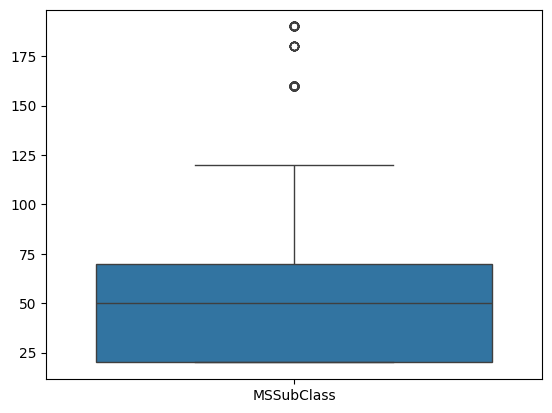

In [32]:
sns.boxplot(data.iloc[:,1:3])

In [34]:
data2 = data.copy()
data3 = data.copy()

In [36]:
X = data.drop(['Id','SalePrice'], axis=1)

In [37]:
y = data['SalePrice']

In [38]:
X = pd.get_dummies(X)

In [39]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,...,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,False,False,False,True,False,False,True,False,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,False,False,False,True,False,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,False,False,False,True,False,False,True,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,False,False,False,True,False,False,True,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,False,False,False,True,False,False,True,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [42]:
X_train, X_valid, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
rs = RobustScaler()
rs_X_train = rs.fit_transform(X_train)
rs_X_valid = rs.transform(X_valid)

In [44]:
import joblib

In [45]:
joblib.dump(rs, './model/iowa_rs_scaler.joblib')

['./model/iowa_rs_scaler.joblib']

In [46]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError

In [47]:
inputs = Input(shape=(rs_X_train.shape[1],))
x = Dense(32, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1)(x)

base_model = Model(inputs=inputs, outputs=outputs)
base_model.summary()

I0000 00:00:1747899554.557183    2520 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1347 MB memory:  -> device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 266)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         8,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,217 (36.00 KB)

 Trainable params: 9,217 (36.00 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
base_model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError()])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_path = './model/iowa_base_model_best.keras'
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', save_best_only=True, verbose=1)
base_model_history = base_model.fit(rs_X_train, y_train, epochs=1000, batch_size=32,
                                    validation_data=(rs_X_valid,y_test),
                                    callbacks=[early_stop, checkpoint],
                                    verbose=1)

Epoch 1/1000


I0000 00:00:1747899952.358826    2875 service.cc:152] XLA service 0x7f1970004420 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747899952.358882    2875 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-05-22 16:45:52.414984: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747899952.660432    2875 cuda_dnn.cc:529] Loaded cuDNN version 90300


30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38534430720.0000 - root_mean_squared_error: 196278.6250

I0000 00:00:1747899952.477048    2875 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 38567981056.0000 - root_mean_squared_error: 196365.2031
Epoch 1: val_loss improved from inf to 39371206656.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 38577692672.0000 - root_mean_squared_error: 196390.5469 - val_loss: 39371206656.0000 - val_root_mean_squared_error: 198421.7812
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38627102720.0000 - root_mean_squared_error: 196498.9375
Epoch 2: val_loss improved from 39371206656.00000 to 39355146240.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 38634725376.0000 - root_mean_squared_error: 196519.4688 - val_loss: 39355146240.0000 - val_root_mean_squared_error: 198381.3125
Epoch 3/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38887763968.0000 - root_mean_squared_error: 197182.5938
Epoch 3: val_loss improved from 39355146240.00000 to 39316942848.00000, saving mo

Epoch 18/1000
22/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26990862336.0000 - root_mean_squared_error: 164274.2188
Epoch 18: val_loss improved from 28603680768.00000 to 27684124672.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 26853382144.0000 - root_mean_squared_error: 163858.2812 - val_loss: 27684124672.0000 - val_root_mean_squared_error: 166385.4688
Epoch 19/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27426570240.0000 - root_mean_squared_error: 165552.7500
Epoch 19: val_loss improved from 27684124672.00000 to 26837405696.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 27206809600.0000 - root_mean_squared_error: 164888.7656 - val_loss: 26837405696.0000 - val_root_mean_squared_error: 163821.2656
Epoch 20/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25340215296.0000 - root_mean_squared_error: 159132.3594
Epoch 20: val_loss improved from 26837405696.0000

Epoch 35/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10630587392.0000 - root_mean_squared_error: 102941.1250
Epoch 35: val_loss improved from 10629216256.00000 to 9569803264.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10524289024.0000 - root_mean_squared_error: 102453.5859 - val_loss: 9569803264.0000 - val_root_mean_squared_error: 97825.3672
Epoch 36/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8978515968.0000 - root_mean_squared_error: 94619.7969
Epoch 36: val_loss improved from 9569803264.00000 to 8582992384.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9010285568.0000 - root_mean_squared_error: 94815.3516 - val_loss: 8582992384.0000 - val_root_mean_squared_error: 92644.4375
Epoch 37/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9707933696.0000 - root_mean_squared_error: 98342.3125 
Epoch 37: val_loss improved from 8582992384.00000 to 76663869

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5304004096.0000 - root_mean_squared_error: 72763.2188 - val_loss: 2631656448.0000 - val_root_mean_squared_error: 51299.6719
Epoch 53/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4799488512.0000 - root_mean_squared_error: 69195.7812
Epoch 53: val_loss did not improve from 2631656448.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4867013120.0000 - root_mean_squared_error: 69688.5234 - val_loss: 2717430272.0000 - val_root_mean_squared_error: 52128.9766
Epoch 54/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4935678976.0000 - root_mean_squared_error: 70212.7500
Epoch 54: val_loss did not improve from 2631656448.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4984233472.0000 - root_mean_squared_error: 70556.5312 - val_loss: 2819312640.0000 - val_root_mean_squared_error: 53097.1992
Epoch 55/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4762297856.0000 - root_mean_squared_error: 68936.1250
Epoch 55: val_loss improv

Epoch 71/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4596143616.0000 - root_mean_squared_error: 67766.8281
Epoch 71: val_loss did not improve from 2138230144.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4608755200.0000 - root_mean_squared_error: 67863.5781 - val_loss: 2186371328.0000 - val_root_mean_squared_error: 46758.6484
Epoch 72/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5010771968.0000 - root_mean_squared_error: 70596.1797
Epoch 72: val_loss did not improve from 2138230144.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5034721280.0000 - root_mean_squared_error: 70780.4453 - val_loss: 2303432448.0000 - val_root_mean_squared_error: 47994.0859
Epoch 73/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4373523456.0000 - root_mean_squared_error: 66005.2812
Epoch 73: val_loss did not improve from 2138230144.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4431988736.0000 - root_mean_squared_error: 66470.5781 - val_loss: 2187536640.0000 - val_root_m

26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4556175872.0000 - root_mean_squared_error: 67472.6328
Epoch 109: val_loss improved from 1858696448.00000 to 1815497856.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4556634624.0000 - root_mean_squared_error: 67481.5312 - val_loss: 1815497856.0000 - val_root_mean_squared_error: 42608.6602
Epoch 110/1000
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4981706240.0000 - root_mean_squared_error: 70302.0391
Epoch 110: val_loss improved from 1815497856.00000 to 1789100288.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5025492480.0000 - root_mean_squared_error: 70692.9609 - val_loss: 1789100288.0000 - val_root_mean_squared_error: 42297.7578
Epoch 111/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4617798144.0000 - root_mean_squared_error: 67830.1562
Epoch 111: val_loss did not improve from 1789100288.00000
32/32 ━━━━━━━━━━━━━

Epoch 128/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4478483456.0000 - root_mean_squared_error: 66818.0938
Epoch 128: val_loss did not improve from 1687202944.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4459385856.0000 - root_mean_squared_error: 66699.5938 - val_loss: 1705859712.0000 - val_root_mean_squared_error: 41302.0547
Epoch 129/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4294715648.0000 - root_mean_squared_error: 65464.0469
Epoch 129: val_loss did not improve from 1687202944.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4216193024.0000 - root_mean_squared_error: 64873.3867 - val_loss: 1700618112.0000 - val_root_mean_squared_error: 41238.5508
Epoch 130/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4381901824.0000 - root_mean_squared_error: 66116.0625
Epoch 130: val_loss did not improve from 1687202944.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4357513728.0000 - root_mean_squared_error: 65950.0156 - val_loss: 1702159232.0000 - val_r

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3949520640.0000 - root_mean_squared_error: 62740.9219 - val_loss: 1790543744.0000 - val_root_mean_squared_error: 42314.8164
Epoch 167/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3982301696.0000 - root_mean_squared_error: 63075.2148
Epoch 167: val_loss did not improve from 1538404736.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4070700288.0000 - root_mean_squared_error: 63769.6758 - val_loss: 1710293248.0000 - val_root_mean_squared_error: 41355.6914
Epoch 168/1000
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4166906368.0000 - root_mean_squared_error: 64226.5078
Epoch 168: val_loss did not improve from 1538404736.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4494493696.0000 - root_mean_squared_error: 66714.4609 - val_loss: 1720721024.0000 - val_root_mean_squared_error: 41481.5742
Epoch 169/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4101353472.0000 - root_mean_squared_error: 63995.1641
Epoch 169: val_loss did

Epoch 186/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4065943040.0000 - root_mean_squared_error: 63707.7383
Epoch 186: val_loss did not improve from 1503722880.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4088997888.0000 - root_mean_squared_error: 63897.4141 - val_loss: 1608399616.0000 - val_root_mean_squared_error: 40104.8555
Epoch 187/1000
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5112015360.0000 - root_mean_squared_error: 71319.3281
Epoch 187: val_loss did not improve from 1503722880.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5019741696.0000 - root_mean_squared_error: 70717.6016 - val_loss: 1746738304.0000 - val_root_mean_squared_error: 41793.9961
Epoch 188/1000
22/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3729097728.0000 - root_mean_squared_error: 60910.5547
Epoch 188: val_loss improved from 1503722880.00000 to 1464701440.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3873194752.0000 - root_

In [51]:
pred = base_model.predict(rs_X_valid)
pred = pd.DataFrame(pred, columns=['pred'])
pred

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


,pred
0,135834.234375
1,288860.812500
2,89084.523438
3,126538.640625
4,286632.125000
...,...
433,99708.335938
434,111991.945312
435,175402.890625
436,115275.789062


In [53]:
y_valid = pd.DataFrame(y_test)
y_valid_df = y_valid.reset_index(drop=True)
final_result = y_valid_df.join(pred)
final_result

,SalePrice,pred
0,154500,135834.234375
1,325000,288860.812500
2,115000,89084.523438
3,159000,126538.640625
4,315500,286632.125000
...,...,...
433,139000,99708.335938
434,126175,111991.945312
435,205950,175402.890625
436,110000,115275.789062


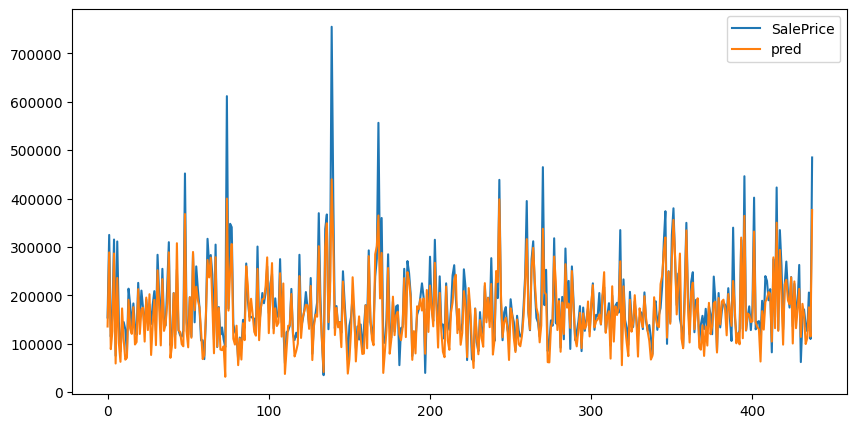

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1492159488.0000 - root_mean_squared_error: 38490.8438
[1417225856.0, 37646.05859375]


In [54]:
plt.figure(figsize=(10,5))
plt.plot(final_result['SalePrice'], label='SalePrice')
plt.plot(final_result['pred'], label='pred')
plt.legend()
plt.show()
print(base_model.evaluate(rs_X_valid, y_valid))

# 어떤 컬럼 선택?
* 컬럼의 상관분석을 통해 타겟변수(종속변수)와 상관도가 높은 컬럼만 선택
* 트리계열 알고리즘을 사용해 분석 후 중요한 변수만 추출해서 재분석

In [55]:
data2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [56]:
data2.drop(['Id'], axis=1, inplace=True)

In [58]:
data2 = pd.get_dummies(data2)
data2.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,...,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,False,False,False,True,False,False,True,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,False,False,False,True,False,False,True,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False


## 상관분석

In [62]:
corr_rate = data2.corr(method='spearman')['SalePrice'].sort_values(ascending=False)

In [66]:
new_cols1 = corr_rate.head(15).index

In [71]:
new_cols2 = corr_rate.tail(5).index

In [73]:
final_cols = list(new_cols1) + list(new_cols2)

In [75]:
final_df = data2[
    final_cols
]

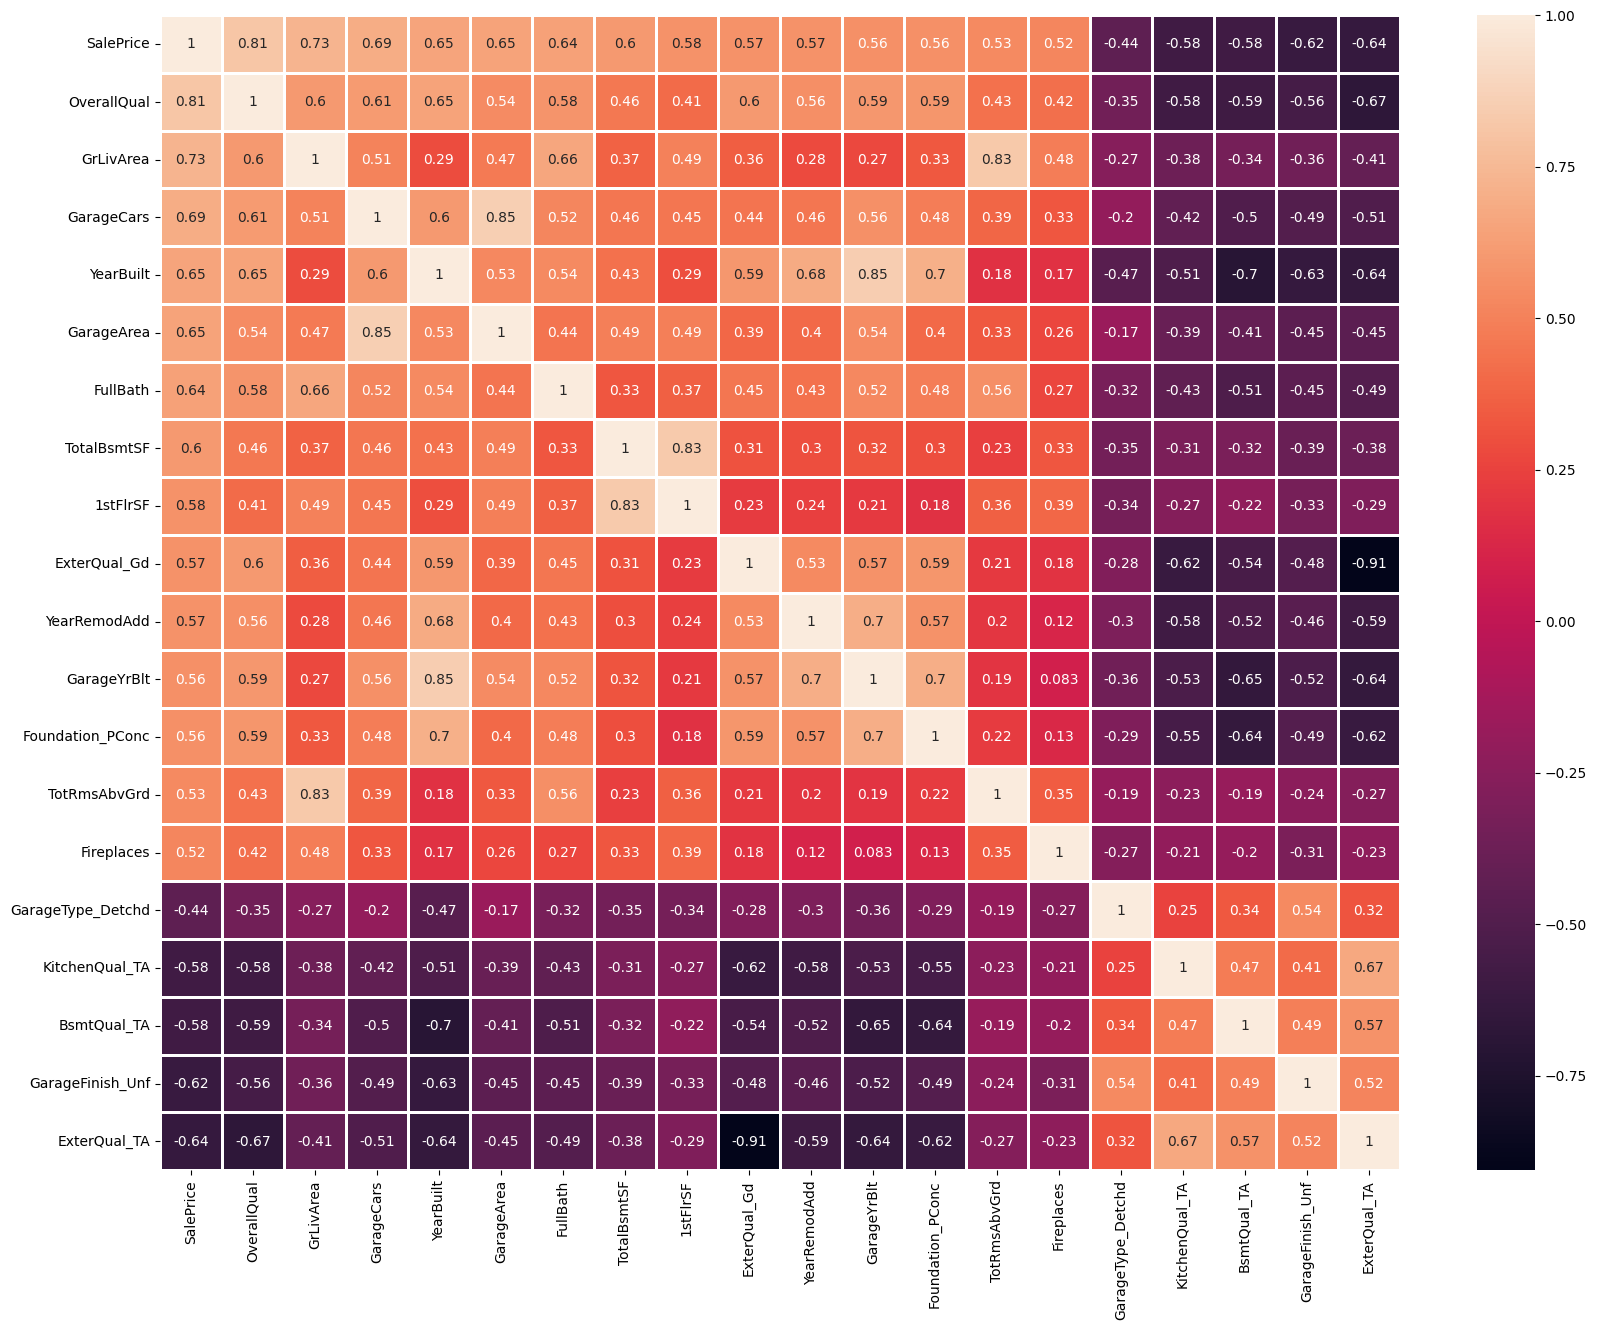

In [84]:
plt.figure(figsize=(20,15))
sns.heatmap(final_df.corr(method='spearman'), annot=True, linewidths=1)
plt.show()

In [85]:
final_df.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt',
       'GarageArea', 'FullBath', 'TotalBsmtSF', '1stFlrSF', 'ExterQual_Gd',
       'YearRemodAdd', 'GarageYrBlt', 'Foundation_PConc', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType_Detchd', 'KitchenQual_TA', 'BsmtQual_TA',
       'GarageFinish_Unf', 'ExterQual_TA'],
      dtype='object')

* 'BsmtQual_TA', 'TotRmsAbvGrd', 'ExterQual_Gd'

In [88]:
final_df = final_df.drop(['BsmtQual_TA', 'TotRmsAbvGrd', 'ExterQual_Gd'], axis=1)

In [89]:
X2 = final_df.drop('SalePrice', axis=1)
y2 = final_df['SalePrice']

In [90]:
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [91]:
rs2 = RobustScaler()
rs_X2_train = rs2.fit_transform(X2_train)
rs_X2_valid = rs2.transform(X2_valid)

In [92]:
rs_X2_train = rs_X2_train.astype('float32')
rs_X2_valid = rs_X2_valid.astype('float32')

In [93]:
inputs = Input(shape=(rs_X2_train.shape[1],))
x = Dense(32, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1)(x)

corr_select_model = Model(inputs=inputs, outputs=outputs)
corr_select_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,217 (4.75 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
corr_select_model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError()])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_path = './model/iowa_corr_select_model_best.keras'
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', save_best_only=True, verbose=1)
corr_select_model_history = corr_select_model.fit(rs_X2_train, y2_train, epochs=1000, batch_size=32,
                                    validation_data=(rs_X2_valid,y2_valid),
                                    callbacks=[early_stop, checkpoint],
                                    verbose=1)

Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 40398708736.0000 - root_mean_squared_error: 200945.5156
Epoch 1: val_loss improved from inf to 39380373504.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 40353067008.0000 - root_mean_squared_error: 200832.3750 - val_loss: 39380373504.0000 - val_root_mean_squared_error: 198444.8906
Epoch 2/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36862963712.0000 - root_mean_squared_error: 191941.7812
Epoch 2: val_loss improved from 39380373504.00000 to 39379193856.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 37198102528.0000 - root_mean_squared_error: 192813.8906 - val_loss: 39379193856.0000 - val_root_mean_squared_error: 198441.9062
Epoch 3/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40932990976.0000 - root_mean_squared_error: 202128.6562
Epoch 3: val_loss improved from 39379193856.00000 to 3

Epoch 18/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28956035072.0000 - root_mean_squared_error: 170114.9688
Epoch 18: val_loss improved from 31891206144.00000 to 30183086080.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29291446272.0000 - root_mean_squared_error: 171094.3438 - val_loss: 30183086080.0000 - val_root_mean_squared_error: 173732.7969
Epoch 19/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28599289856.0000 - root_mean_squared_error: 168954.2344
Epoch 19: val_loss improved from 30183086080.00000 to 28228818944.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 28630005760.0000 - root_mean_squared_error: 169088.2812 - val_loss: 28228818944.0000 - val_root_mean_squared_error: 168014.3438
Epoch 20/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27095996416.0000 - root_mean_squared_error: 164582.5938
Epoch 20: val_loss improved from 282

Epoch 35/1000
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7316914176.0000 - root_mean_squared_error: 85465.9141
Epoch 35: val_loss improved from 4562298368.00000 to 4288243200.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7404041728.0000 - root_mean_squared_error: 85991.6953 - val_loss: 4288243200.0000 - val_root_mean_squared_error: 65484.6797
Epoch 36/1000
22/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7217518080.0000 - root_mean_squared_error: 84922.4062
Epoch 36: val_loss improved from 4288243200.00000 to 4065196032.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7199204864.0000 - root_mean_squared_error: 84824.8672 - val_loss: 4065196032.0000 - val_root_mean_squared_error: 63758.8906
Epoch 37/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6990453248.0000 - root_mean_squared_error: 83471.1250
Epoch 37: val_loss improved from 4065196032.00000 to 

26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5133547520.0000 - root_mean_squared_error: 71592.3672
Epoch 70: val_loss did not improve from 2966888704.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5217402368.0000 - root_mean_squared_error: 72178.5859 - val_loss: 2972842752.0000 - val_root_mean_squared_error: 54523.7812
Epoch 71/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6156243456.0000 - root_mean_squared_error: 78346.1406
Epoch 71: val_loss improved from 2966888704.00000 to 2953019136.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6115702272.0000 - root_mean_squared_error: 78093.4375 - val_loss: 2953019136.0000 - val_root_mean_squared_error: 54341.6875
Epoch 72/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7344011264.0000 - root_mean_squared_error: 85369.0000
Epoch 72: val_loss improved from 2953019136.00000 to 2892319232.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━

Epoch 107/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6206661120.0000 - root_mean_squared_error: 78540.0938
Epoch 107: val_loss improved from 2536800768.00000 to 2527143168.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6037112832.0000 - root_mean_squared_error: 77464.2969 - val_loss: 2527143168.0000 - val_root_mean_squared_error: 50270.6992
Epoch 108/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5418898944.0000 - root_mean_squared_error: 73555.5469
Epoch 108: val_loss improved from 2527143168.00000 to 2484190464.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5356059648.0000 - root_mean_squared_error: 73124.9609 - val_loss: 2484190464.0000 - val_root_mean_squared_error: 49841.6523
Epoch 109/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6325792768.0000 - root_mean_squared_error: 79111.1953
Epoch 109: val_loss did not improve from 2484190

In [95]:
pred = corr_select_model.predict(rs_X2_valid)
pred = pd.DataFrame(pred, columns=['pred'])
pred

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


,pred
0,69911.179688
1,298372.468750
2,108402.335938
3,123056.398438
4,287132.375000
...,...
433,68600.929688
434,71760.140625
435,190240.453125
436,113617.023438


In [96]:
y2_valid = pd.DataFrame(y2_valid)
y2_valid_df = y2_valid.reset_index(drop=True)
final_result2 = y2_valid_df.join(pred)
final_result2

,SalePrice,pred
0,154500,69911.179688
1,325000,298372.468750
2,115000,108402.335938
3,159000,123056.398438
4,315500,287132.375000
...,...,...
433,139000,68600.929688
434,126175,71760.140625
435,205950,190240.453125
436,110000,113617.023438


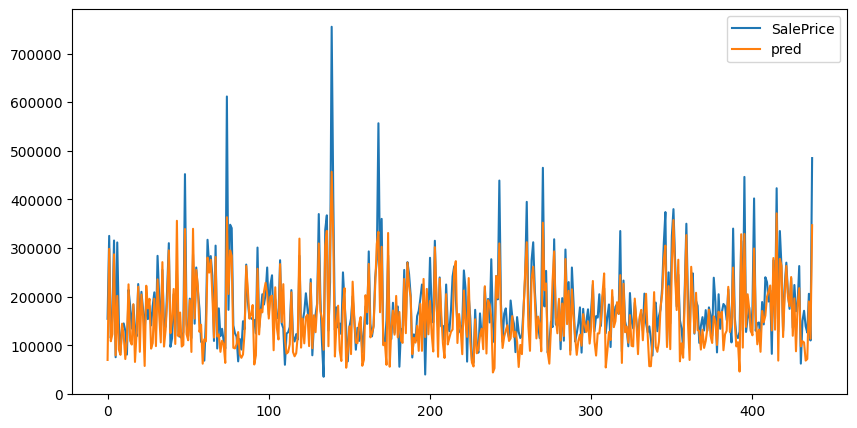

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2380184064.0000 - root_mean_squared_error: 48709.8711
[2335174912.0, 48323.6484375]


In [97]:
plt.figure(figsize=(10,5))
plt.plot(final_result2['SalePrice'], label='SalePrice')
plt.plot(final_result2['pred'], label='pred')
plt.legend()
plt.show()
print(corr_select_model.evaluate(rs_X2_valid, y2_valid))